In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df  = pd.read_csv("Oscars-demographics-DFE.csv", encoding = 'latin')
df = pd.DataFrame(df)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


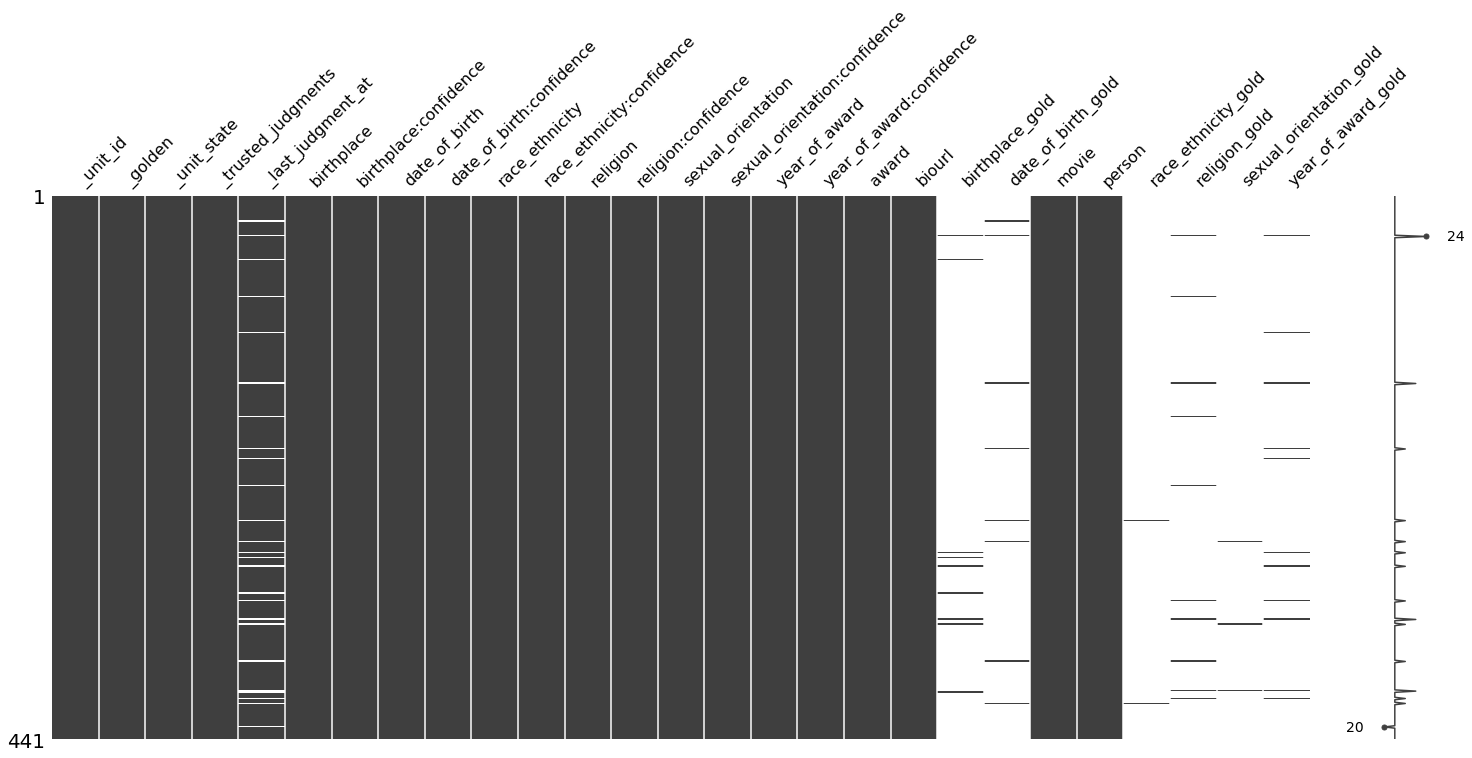

In [3]:
msno.matrix(df)

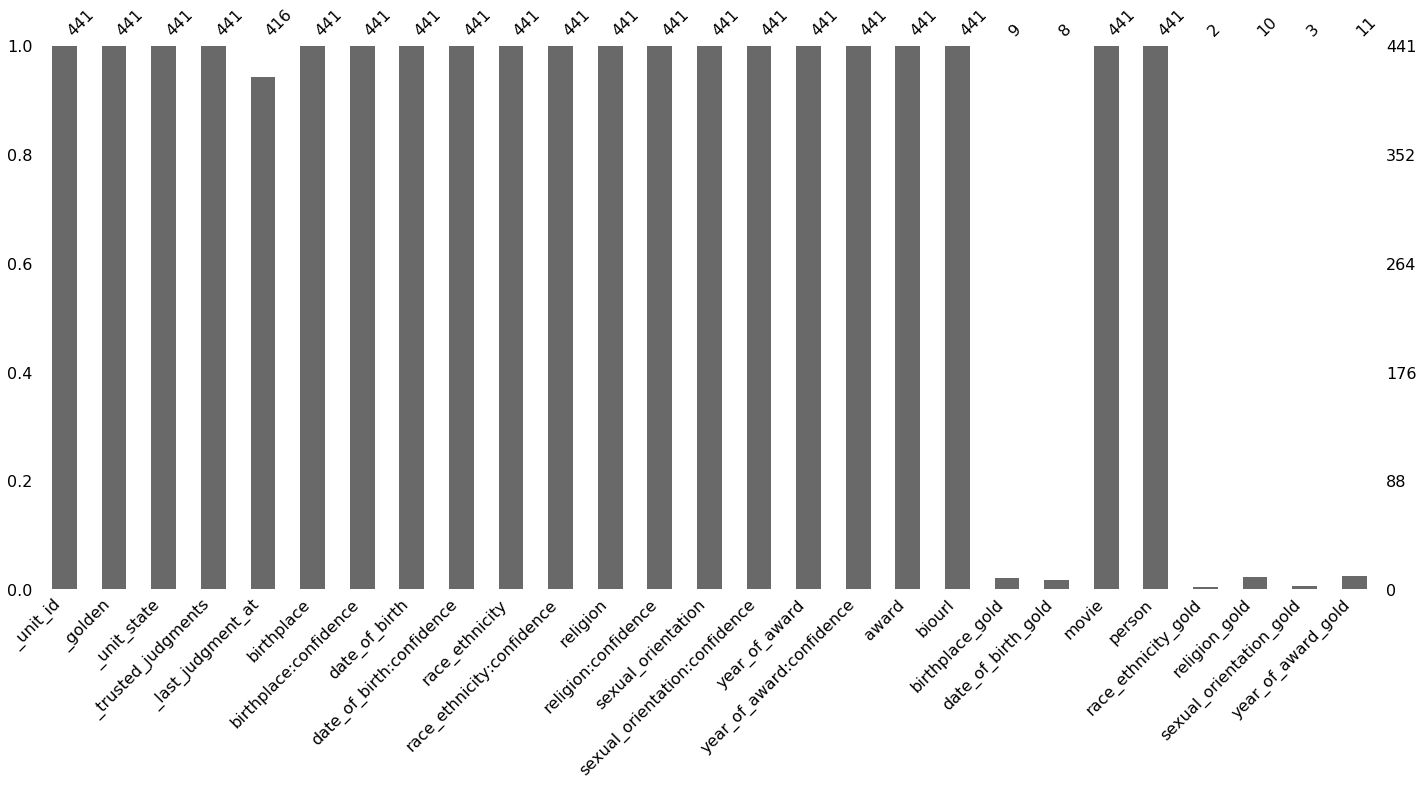

In [4]:
msno.bar(df)

In [5]:
items = (df['_golden'].unique())
items

array([False,  True])

In [6]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [7]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df

,False,1.0
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
436,1,1
437,1,1
438,1,1
439,1,1


In [8]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 2 combinations | Sampling itemset size 2


,support,itemsets
0,0.943311,(False)
1,1.000000,(1.0)
2,0.943311,"(False, 1.0)"


In [9]:
freq_items.itemsets.unique()

array([frozenset({False}), frozenset({1.0}), frozenset({False, 1.0})],
      dtype=object)

In [10]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(False),(1.0),0.943311,1.000000,0.943311,1.000000,1.0,0.0,inf
1,(1.0),(False),1.000000,0.943311,0.943311,0.943311,1.0,0.0,1.0
